In [ ]:
# Time Series Forecasting
## ARIMA - Auto Regressive Integrated Moving Average
### Durbin watson value should be either less than 1.5 or more than 2.5
### There must be date and time column
### Date column should be in sequence order
### There should not be any missing data - imputation method
### check whether we have trend, seasonality, cyclical and random noise - decomposition method
### Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction)
### Time Series Forecasting predicted value should be "Stationary" - Augmented Dickey Fuller Test or Rolling method

# Import the required libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

In [11]:
df = pd.read_csv('datasets_302666_618181_AAPL.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
5,8/22/2018,214.100006,216.360001,213.839996,215.050003,211.763901,19018100
6,8/23/2018,214.649994,217.050003,214.600006,215.490005,212.197189,18883200
7,8/24/2018,216.600006,216.899994,215.110001,216.160004,212.856949,18476400
8,8/27/2018,217.149994,218.740005,216.330002,217.940002,214.609741,20525100
9,8/28/2018,219.009995,220.539993,218.919998,219.699997,216.342850,22776800


In [7]:
from pandas.tseries.offsets import BDay

In [9]:
df.shape

(251, 7)

In [13]:
df_date = df[['Date','Volume']]

In [17]:
df_date.tail()

,Date,Volume
246,8/8/2019,27009500
247,8/9/2019,24619700
248,8/12/2019,22474900
249,8/13/2019,47218500
250,8/14/2019,36453100


In [19]:
date1 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=BDay())

In [21]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [23]:
len(date1)

261

In [29]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [31]:
date2 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)

In [33]:
date2

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [35]:
len(date2)

251

In [47]:
df_date['Time_Stamp'] = pd.DataFrame(date2, columns=['Date'])
df_date['Open'] = pd.DataFrame(df, columns=['Open'])

In [49]:
df_date

,Date,Volume,Time_Stamp,Open
0,8/15/2018,28807600,2018-08-15,209.220001
1,8/16/2018,28500400,2018-08-16,211.750000
2,8/17/2018,35427000,2018-08-17,213.440002
3,8/20/2018,30287700,2018-08-20,218.100006
4,8/21/2018,26159800,2018-08-21,216.800003
...,...,...,...,...
246,8/8/2019,27009500,2019-08-08,200.199997
247,8/9/2019,24619700,2019-08-09,201.300003
248,8/12/2019,22474900,2019-08-12,199.619995
249,8/13/2019,47218500,2019-08-13,201.020004


In [51]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    object        
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
 3   Open        251 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.0+ KB


In [45]:
df_date.isnull().sum()

Date          0
Volume        0
Time_Stamp    0
dtype: int64

In [53]:
# Durbin Watson Test
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Volume'])

0.13804147049471416

In [55]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Open'])

0.0003174209031518406

In [ ]:
### Durbin watson value should be either less than 1.5 or more than 2.5 - Satisfied
### There must be date and time column - satisfied
### Date column should be in sequence order - Satisfied
### There should not be any missing data - imputation method - Satisfied 
### check whether we have trend, seasonality, cyclicity and random noise - decomposition method - checked and we have trend and seasonality there
### Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction) - Satisfied
### Time Series Forecasting predicted value should be "Stationary" - Augmented Dickey Fuller Test or Rolling method

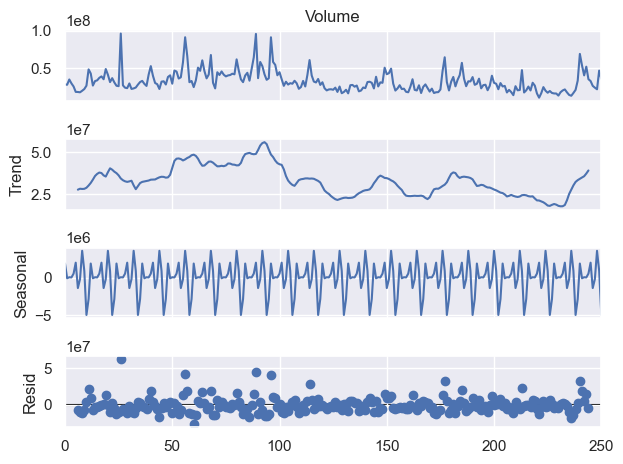

In [59]:
# Decomposition method
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_date['Volume'], period=12)
decomposition.plot()
plt.show()

In [61]:
df_date['Date'] = pd.to_datetime(df_date['Date'])

In [63]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
 3   Open        251 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 8.0 KB
